[https://colab.research.google.com/drive/18PUo69_NjWuWMy7uenpDHLqj8KmAs_l9?authuser=2#scrollTo=3vUXPjDe1j_i](https://colab.research.google.com/drive/18PUo69_NjWuWMy7uenpDHLqj8KmAs_l9?authuser=2#scrollTo=3vUXPjDe1j_i)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Colab 進行 matplotlib 繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-09-03 04:17:02--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.23.138, 74.125.23.113, 74.125.23.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.23.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j717ess11nht6fc0o3o8a1hvevphrs3g/1693714575000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=d14f39c1-704f-4a8c-b6e5-0e76158710ed [following]
--2023-09-03 04:17:07--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j717ess11nht6fc0o3o8a1hvevphrs3g/1693714575000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=d14f39c1-704f-4a8c-b6e5-0e76158710ed
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.174.132, 2404:6800:4008:c1b::84
Connecting to doc-0k-9o

# Read data

In [47]:
data_df = pd.read_csv('/content/drive/MyDrive/2023_DA_military/dispPtV2_20AUG.csv')

In [50]:
data_df.iloc[0:1,:]

,Banner,Person,Era,YoE,Loc1st,Loc2nd,Section,Page,text,Loc,lat,lon,year
0,鑲黃旗,楊名高,崇德,七年,塔山,['諸臺'],八旗通志初集卷之一百七十三名臣列傳三十三,4210,崇德七年，任牛彔章京，隨固山額真劉之源征明圍錦州，擊敗山口敵兵。又用紅衣炮攻克塔山城，並收附...,塔山,40.821941,120.935895,1642


## 調整格式

In [52]:
data_df = data_df.sort_values(by='year') # sort the rows by year

# Data overview

In [ ]:
data_df.iloc[0:2,]

,Banner,Person,Era,YoE,Loc1st,Loc2nd,Section,Page,text,Loc,lat,lon,year
0,鑲黃旗,楊名高,崇德,七年,塔山,['諸臺'],八旗通志初集卷之一百七十三名臣列傳三十三,4210,崇德七年，任牛彔章京，隨固山額真劉之源征明圍錦州，擊敗山口敵兵。又用紅衣炮攻克塔山城，並收附...,塔山,40.821941,120.935895,1642
1,鑲黃旗,楊名高,崇德,七年,杏山,['諸臺'],八旗通志初集卷之一百七十三名臣列傳三十三,4210,崇德七年，任牛彔章京，隨固山額真劉之源征明圍錦州，擊敗山口敵兵。又用紅衣炮攻克塔山城，並收附...,杏山,40.951450,121.081665,1642


## 資料數量

In [ ]:
print(data_df.shape)

(570, 13)


## Select the columns of interest

In [ ]:
# select interesting variables without coordinates (10,11)
column_names = data_df.columns
column_names_select = column_names[[0,1,2,9,12]]
print(column_names_select)


Index(['Banner', 'Person', 'Era', 'Loc', 'year'], dtype='object')


## Number of distinct(unique) values

In [ ]:
# how many unique values in an intresting column
for column_name in column_names_select:
  num_unique_values = data_df[column_name].nunique()
  print(f"{column_name}:{num_unique_values}")


Banner:8
Person:124
Era:3
Loc:32
year:17


## Distribution of 'Banner'

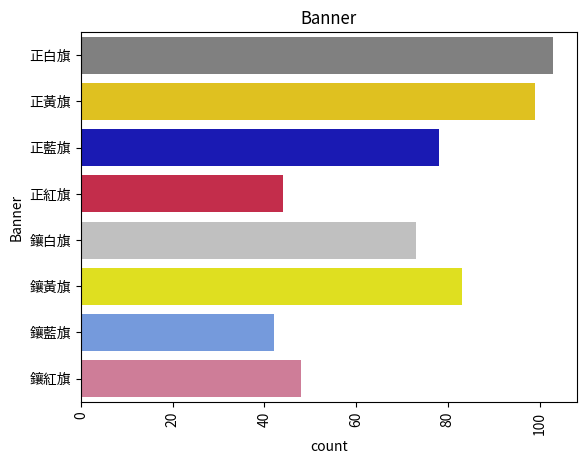

In [ ]:
column_name = 'Banner'
order = ['正白旗', '正黃旗', '正藍旗', '正紅旗', '鑲白旗', '鑲黃旗', '鑲藍旗', '鑲紅旗']
custom_palette = {'正白旗': 'gray', '正黃旗': 'Gold', '正藍旗': 'MediumBlue', '正紅旗': 'crimson',
                  '鑲白旗': 'silver', '鑲黃旗': 'yellow', '鑲藍旗': 'cornflowerblue', '鑲紅旗': 'Palevioletred'}


column_counts = data_df[column_name].value_counts().reset_index() # reset_index: 把 index 變成 column
column_counts.columns = ['Banner', 'count']

sns.barplot(x='count', y='Banner', data=column_counts, order = order, orient='h', palette = custom_palette)
plt.title(column_name)
plt.xticks(rotation='vertical')
plt.show()

## Distribution of 'Banner' and 'Era'

In [ ]:
df = data_df[['Banner', 'Era']]

# 使用 groupby 按年份和 Banner 分组，计算筆數
banner_era_counts = df.groupby(['Era', 'Banner']).size().reset_index()
banner_era_counts = banner_era_counts.fillna(0) # NaN 補 0

# assign column names (不知為第三個欄位是0何無法直接修改)
banner_era_counts.rename(columns=lambda x: f'Count_{x}', inplace=True)
banner_era_counts.columns = ['Era','Banner','count']

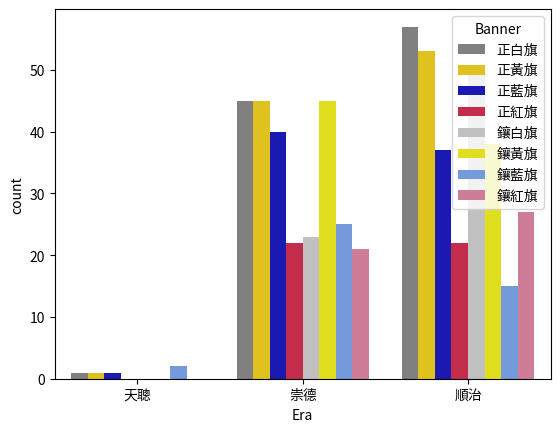

In [ ]:


sns.barplot(data=banner_era_counts, x='Era', y='count', hue='Banner', hue_order = order, palette = custom_palette)
plt.show()


## Time series of 'Banner'

In [ ]:
# df = data_df[['Banner', 'year']]

# # 使用 groupby 按年份和 Banner 分组，计算筆數
# banner_year_counts = df.groupby(['year', 'Banner']).size().unstack()
# banner_year_counts = banner_year_counts.fillna(0) # NaN 補 0

# # 绘制折线图展示每个班级随着年份变化的人数
# ax = banner_year_counts.plot(kind='line', marker='o', figsize=(10, 6))
# ax.set_xlabel('Year')
# ax.set_ylabel('Count')
# ax.set_title('Banner Counts Over Years')
# ax.legend(title='Banner')
# plt.show()



In [ ]:
df = data_df[['Banner', 'year']]

banner_year_counts = df.groupby(['year', 'Banner']).size()
banner_year_counts = banner_year_counts.fillna(0) # NaN 補 0
banner_year_counts = banner_year_counts.reset_index()

# assign column names (不知為第三個欄位是0何無法直接修改)
banner_year_counts.rename(columns=lambda x: f'Count_{x}', inplace=True)
banner_year_counts.columns = ['year','banner','count']

df = banner_year_counts
# 创建包含所有可能 year 和 banner 组合的数据框
# all_years = df['year'].unique()
all_years = np.arange(1630,1657)
all_banners = df['banner'].unique()
all_combinations = pd.MultiIndex.from_product([all_years, all_banners], names=['year', 'banner'])
all_data = pd.DataFrame(index=all_combinations).reset_index()

# 将两个数据框合并，并填充缺失的 count 为 0
merged_df = all_data.merge(df, on=['year', 'banner'], how='left').fillna(0)


<Axes: xlabel='year', ylabel='count'>

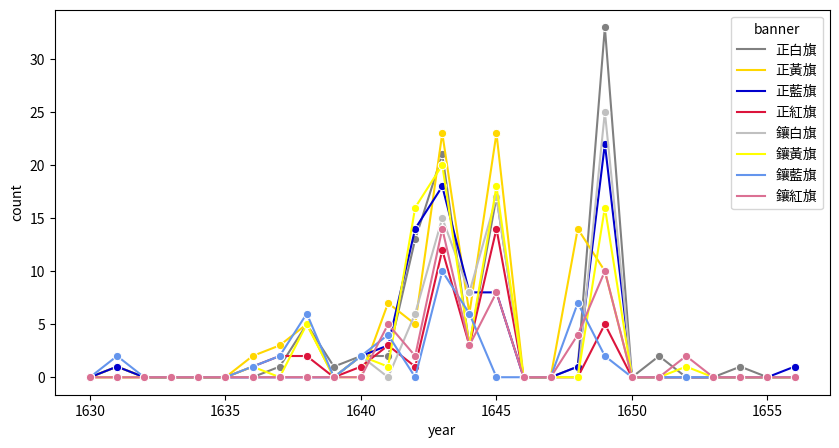

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=merged_df, x='year', y='count', hue='banner', marker='o', hue_order = order, palette = custom_palette)

## 有無 person 屬於多個banner? no

In [ ]:
df_group = data_df[['Banner', 'Person']].groupby(['Person', 'Banner']).size().reset_index()
df_group.duplicated(subset=['Person', 'Banner']).any()

False

# Artillery sieging experience (砲兵攻城經驗值)

新增欄位 "experience"，計算方式是：資料中的一筆資料代表一次攻城成功，計算 Person 第幾次攻城成功。

In [58]:
df = data_df
df['experience'] = df.groupby('Person').cumcount() + 1 # start from 1
df = df[['Banner', 'Person', 'year','experience']]
df_exp = df

df_exp.iloc[0:3,:]

,Banner,Person,year,experience
288,鑲藍旗,墨爾根轄李國翰,1631,1
226,正藍旗,佟養性,1631,1
499,正白旗,何智機理,1631,1


## 整體經驗人次隨時間的變化

Aggregate data by year and experience and count the number of elements.

    year  experience  count
0   1631           1      5
1   1636           1      3
2   1636           2      1
3   1636           3      1
4   1637           1      2
..   ...         ...    ...
83  1651           2      1
84  1651           8      1
85  1652           4      3
86  1654           4      1
87  1656           2      1

[88 rows x 3 columns]
experience  1   2   3   4   5   6   7   8   9   10  11  12
year                                                      
1631         5   0   0   0   0   0   0   0   0   0   0   0
1636         3   1   1   0   0   0   0   0   0   0   0   0
1637         2   3   2   1   0   0   0   0   0   0   0   0
1638         1   3   4   6   6   3   0   0   0   0   0   0
1639         0   0   0   0   0   0   1   0   0   0   0   0
1640         8   2   0   0   0   1   0   0   0   0   0   0
1641         9   8   5   1   0   0   1   1   0   0   0   0
1642        16  22  11   5   1   0   1   1   0   0   0   0
1643        35  32  15  21  17   7   2   0   2   2 

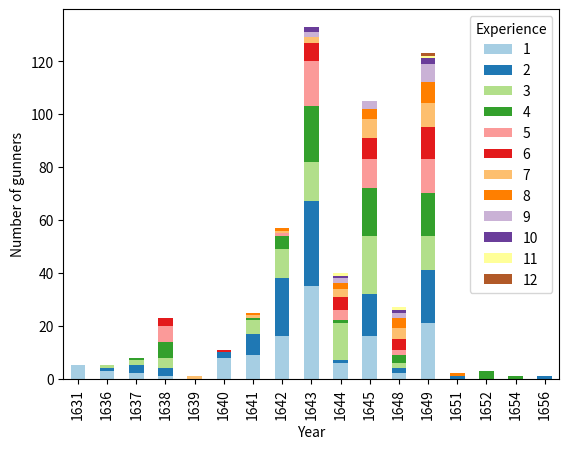

In [64]:
# aggregate
df = df_exp.groupby(['year', 'experience']).size()
df = df.reset_index(name='count')
print(df)

# long format to wide format, for plot
df = df.pivot_table(index='year', columns='experience', values='count', aggfunc='sum', fill_value=0)
print(df)

# barchart
sns.set_palette("Paired")
df.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Number of gunners')
plt.legend(title='Experience')
plt.show()


## 各Banner經驗人次隨時間的變化

In [70]:
df = df_exp.groupby(['year', 'Banner', 'experience']).size()
df = df.reset_index(name = 'count')
df_exp_banner = df

In [74]:
# all_banners = df_exp_banner['Banner'].unique()
# for one_banner in all_banners:

#   # 选择特定 'Banner' 值的所有行
#   selected_banner = one_banner
#   df = df_exp_banner[df_exp_banner['Banner'] == selected_banner]
#   df = df.sort_values(by='year')

#   # 使用 pivot_table 将数据重塑为适合绘制堆叠条形图的形式
#   pivot_df = df.pivot_table(index='year', columns='experience', values='count', aggfunc='sum', fill_value=0)

#   sns.set_palette("Paired")  # 使用默认颜色方案
#   pivot_df.plot(kind='bar', stacked=True)
#   plt.xlabel('Year')
#   plt.ylabel('Number of gunners')
#   plt.title(selected_banner)
#   plt.legend(title='Experience')
#   plt.show()
#   plt.savefig(f'experience_{one_banner}.png')


## 最高經驗的人數分佈 (~1643 年末)

In [97]:
df = df_exp[df_exp['year']<1644] # 挑出 1643年末之前
df = df.groupby('Person')['experience'].max()
df = df.reset_index(name = 'experience_max')
# df = df.sort_values(by='experience_max')
df_exp_before_1643 = df

print(df_exp_before_1643.iloc[0:2,])

  Person  experience_max
0   何智機理               6
1     佟代               4


In [94]:
print(df.shape[0]) # 總共有多少人
print(df[df['experience_max']>1].shape[0]) # 最高經驗 > 1的人數
print(df[df['experience_max']>1].shape[0]/df.shape[0]) # 最高經驗 > 1的比例

79
71
0.8987341772151899


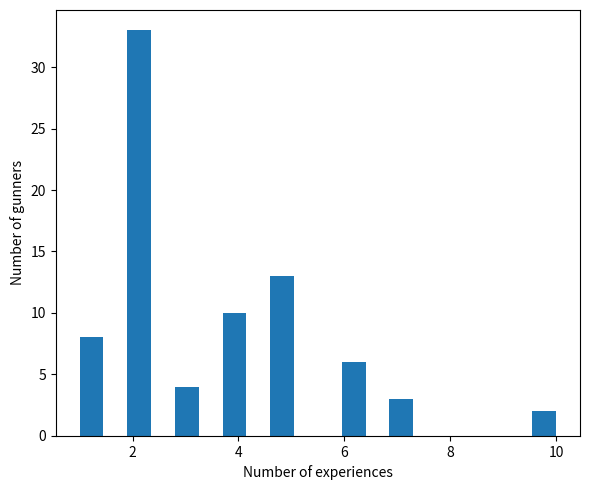

In [92]:
df['experience_max'].plot(kind='hist',
                          bins=20,
                          figsize=(6, 5),
                          color=sns.color_palette('tab10')[0])
plt.xlabel('Number of experiences')
plt.ylabel('Number of gunners')
plt.tight_layout()

## 人數問題

### 1644-1661 作戰的人數

In [101]:
df = df_exp
df = df[df['year']<1662]
df = df[df['year']>1643]
print(df['Person'].nunique())
df_1644_1661 = df


87


### 1644-1661 作戰的人有多少是 1643 年末前已有經驗

In [102]:
person_1643 = df_exp_before_1643['Person'].unique()
person_1644_1661 = df_1644_1661['Person'].unique()

print(df_exp_before_1643['Person'].nunique()) # 1643 年前有作戰經驗的人數
print(df_1644_1661['Person'].nunique()) # 1643 年前有作戰經驗的人數

common_names = pd.Series(np.intersect1d(person_1643, person_1644_1661))
print(common_names.nunique()) # 交集人數

79
87
42


### 1643年末前有打仗，但1644之後不繼續打的人數 (quit)

In [ ]:
difference_a = np.setdiff1d(person_1643, person_1644_1661)
print(difference_a.shape)
print(difference_a)


(37,)
['何智機理' '佟國印' '佟圖占' '佟學文' '佟養性' '劉光弼' '劉曰可' '劉涵英' '劉漢' '呂應學' '孔有德' '孟喬芳'
 '尚好仁' '崔應泰' '張成德' '方得勝' '李天成' '李時芳' '李茂芳' '柯永盛' '楊名高' '王仲善' '王國光' '王國明'
 '王棟' '盧延祚' '石廷柱' '祖可法' '祖大眷' '耿仲明' '蔣成良' '蘭繼友' '金玉和' '金維城' '馬光輝' '馬光遠'
 '馬如璧']
